<a href="https://colab.research.google.com/github/ykitaguchi77/statistics_for_articles/blob/main/Surgically_induced_astigmatism_eyelid_malignant_tumor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Surgically induced astigmatism and higher order abberation after surgery of the eyelid malignant tumor**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

xlsx_path = "/content/drive/MyDrive/発表/日本眼形成再建外科学会/202306 HOA after wide excision/眼瞼悪性腫瘍波面_2.xlsx"
excel_data = pd.read_excel(xlsx_path)

df = excel_data.drop(['ID', 'Name'], axis=1) #idとnameを削除

# Display the first few rows of the dataframe
df.head()


,生年月日,性別,side,手術日,Unnamed: 6,lower-upper,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,HOA_pre,HOA_1M,HOA_3M,ΔHOA,Tumor_size,Margin,Defect,Defect_calc,Precedure,Complications
0,19400122,M,L,20180209,Basal cell carcinoma,0,左 下眼瞼基底細胞癌,1,1,wide excision,...,0.199,0.458(2),0.221,0.022,5,5,15,5+5+5=15,maximum Hughes flap(内側は骨膜を利用)・皮膚移植(右上眼瞼より)・眼輪筋...,SPK 下側
1,19480423,M,L,20180302,Sebaceous gland carcinoma,1,左 上眼瞼脂腺癌,1,1,wide Excision,...,0.170,0.254/0.259(2),0.296,0.126,6,5,16,6+5+5=16,遊離瞼板結膜弁・上眼瞼皮膚切除・眼輪筋前転,SPK 耳上側
2,19750121,F,R,20180816,Sebaceous gland carcinoma,0,右 下眼瞼脂腺癌,1,1,Wide excision and reconstruction using reverse...,...,0.099,0.068,0.097,-0.002,3,3,9,3+3+3=9,tenzel flap,角膜上皮びらん 下側
3,19520519,F,L,20180913,Sebaceous gland carcinoma,1,左 上眼瞼脂腺癌,1,1,Wide excision and reconstruction using free ta...,...,0.288,0.250/0.206,0.164,-0.124,8,5,18,8+5+5=18,遊離瞼板弁(右上眼瞼より),SPK
4,19490417,F,L,20181213,Sebaceous gland carcinoma,0,左 下眼瞼基底細胞癌,1,1,Wide exision + reconstruction,...,0.190,0.315/0.303,0.178,-0.012,6,4,14,6+4+4=14,遊離瞼板弁・皮膚移植(左上眼瞼より)(sandwich flap),なし


In [3]:
from datetime import datetime

#年齢の算出
def calculate_age_robust(birth_date, surgery_date):
    try:
        # Handling potential inconsistencies in date formats
        birth_str = str(birth_date).split("/")[0]  # Handling dates with slashes
        surgery_str = str(surgery_date).split("/")[0]  # Handling dates with slashes

        birth = datetime.strptime(birth_str, "%Y%m%d")
        surgery = datetime.strptime(surgery_str, "%Y%m%d")
        age = surgery.year - birth.year - ((surgery.month, surgery.day) < (birth.month, birth.day))
        return age
    except Exception as e:
        # Returning a placeholder in case of any errors
        return None

# Applying the updated function to the dataframe
df['age'] = df.apply(lambda x: calculate_age_robust(x['生年月日'], x['手術日']), axis=1)

# Calculating statistical values for the Age_at_Surgery column
age_statistics = df['age'].describe()

print(age_statistics)

count    21.000000
mean     70.000000
std      13.270268
min      38.000000
25%      66.000000
50%      73.000000
75%      78.000000
max      87.000000
Name: age, dtype: float64


In [4]:
#Δasg_absの算出
def calculate_asg_abs(CASIA_CYL_pre, CASIA_CYL_3M):
    delta = CASIA_CYL_3M - CASIA_CYL_pre
    return delta

# Applying the updated function to the dataframe
df['Δasg_abs'] = df.apply(lambda x: calculate_asg_abs(x['CASIA_CYL_pre'], x['CASIA_CYL_3M']), axis=1)

In [5]:
#その他の統計量
# Extracting relevant columns: Gender, Left/Right (Unnamed: 4), and Defect size
gender_lr_defect = df[['性別', 'side', 'Defect']]

# Renaming columns for clarity
gender_lr_defect.columns = ['Gender', 'Left/Right', 'Defect Size']

# Calculating statistics for Defect Size
defect_stats = gender_lr_defect['Defect Size'].describe()

# Counting occurrences for Gender and Left/Right
gender_counts = gender_lr_defect['Gender'].value_counts()
left_right_counts = gender_lr_defect['Left/Right'].value_counts()

print(gender_counts)
print("")
print(left_right_counts)
print("")
print(defect_stats)




F    15
M     6
Name: Gender, dtype: int64

R    11
L    10
Name: Left/Right, dtype: int64

count    21.000000
mean     15.476190
std       6.265932
min       8.000000
25%      12.000000
50%      14.000000
75%      18.000000
max      34.000000
Name: Defect Size, dtype: float64


In [6]:
#上眼瞼と下眼瞼に分けて解析

# Splitting the dataframe based on the 'upper_lower' column values
df_lower = df[df["lower-upper"] == 0]
df_upper = df[df["lower-upper"] == 1]

# Displaying the first few rows of each new dataframe to verify
print(f"上眼瞼: {len(df_upper)}例、下眼瞼: {len(df_lower)}例")
#df_lower.head(), df_upper.head()


上眼瞼: 7例、下眼瞼: 14例


In [7]:
from scipy.stats import mannwhitneyu

# 上眼瞼と下眼瞼の比較 --> 有意差なし
# Function to perform Mann-Whitney U test and return the p-value
def perform_mannwhitneyu_test(column):
    stat, p_value = mannwhitneyu(df_lower[column].dropna(), df_upper[column].dropna())
    return p_value

# Performing the test for each column
columns_to_compare = ["SIA_D", "Δasg_abs", "Δasg_0", "Δasg_45", "ΔHOA"]
p_values = {column: perform_mannwhitneyu_test(column) for column in columns_to_compare}

p_values

{'SIA_D': 0.3223082215342278,
 'Δasg_abs': 0.5498374263359715,
 'Δasg_0': 0.6888200894392846,
 'Δasg_45': 0.360061919504644,
 'ΔHOA': 0.5352597179222567}

In [8]:
from scipy.stats import wilcoxon

#preと3Mの高次収差の比較

# Performing Wilcoxon Signed-Rank Test for HOA_pre and HOA_3M
wilcoxon_test_result = wilcoxon(df['HOA_pre'], df['HOA_3M'])

# Wilcoxon test result
wilcoxon_test_statistic, wilcoxon_test_pvalue = wilcoxon_test_result
print(wilcoxon_test_statistic, wilcoxon_test_pvalue)


# Calculating descriptive statistics for HOA_pre and HOA_3M
hoa_pre_stats = df['HOA_pre'].describe()
hoa_3m_stats = df['HOA_3M'].describe()

print(hoa_pre_stats)
print(hoa_3m_stats)



35.0 0.0037527084350585938
count    21.000000
mean      0.180619
std       0.077137
min       0.082000
25%       0.110000
50%       0.179000
75%       0.214000
max       0.353000
Name: HOA_pre, dtype: float64
count    21.000000
mean      0.264667
std       0.171358
min       0.097000
25%       0.153000
50%       0.221000
75%       0.296000
max       0.798000
Name: HOA_3M, dtype: float64


In [9]:
# Performing Wilcoxon Signed-Rank Test for HOA_0_pre and HOA_0_3M
wilcoxon_test_HOA_0 = wilcoxon(df['HOA_pre'], df['HOA_3M'])

# Wilcoxon test result for HOA_0_pre and HOA_0_3M
wilcoxon_test_HOA_0_statistic, wilcoxon_test_HOA_0_pvalue = wilcoxon_test_HOA_0
wilcoxon_test_HOA_0_statistic, wilcoxon_test_HOA_0_pvalue

(35.0, 0.0037527084350585938)

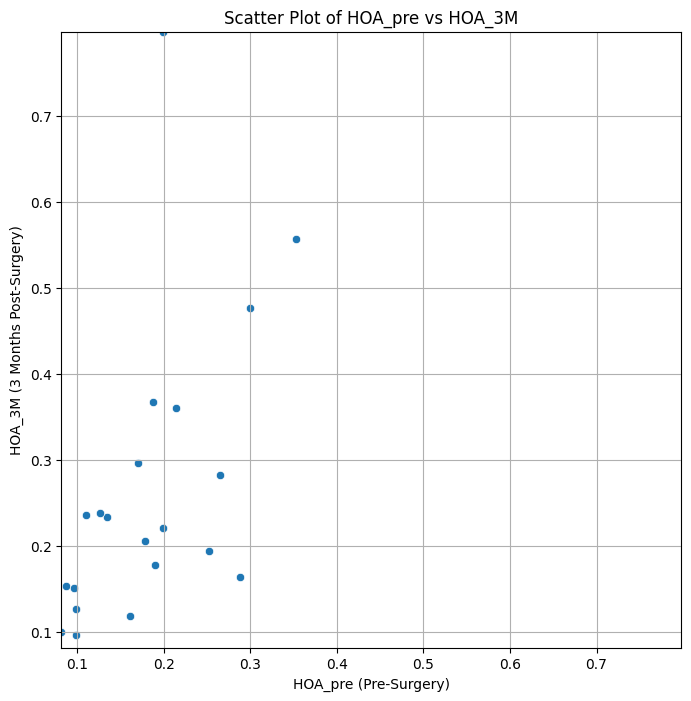

r=0.5376412066808074, p=0.011947261388842003


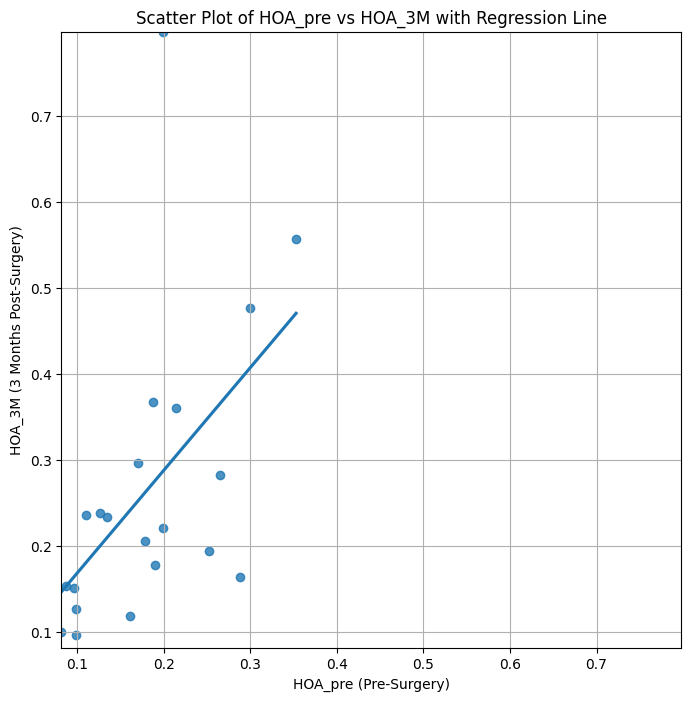

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting a scatter plot of HOA_pre and HOA_3M with equal axis scales
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x='HOA_pre', y='HOA_3M')
plt.title('Scatter Plot of HOA_pre vs HOA_3M')
plt.xlabel('HOA_pre (Pre-Surgery)')
plt.ylabel('HOA_3M (3 Months Post-Surgery)')
plt.grid(True)

# Setting equal scales for both axes
plt.xlim(df[['HOA_pre', 'HOA_3M']].min().min(), df[['HOA_pre', 'HOA_3M']].max().max())
plt.ylim(df[['HOA_pre', 'HOA_3M']].min().min(), df[['HOA_pre', 'HOA_3M']].max().max())

plt.show()


from scipy.stats import pearsonr

# Calculating Pearson correlation and p-value between HOA_pre and HOA_3M
pearson_corr_hoa_result = pearsonr(df['HOA_pre'], df['HOA_3M'])

# Pearson correlation result and p-value for HOA_pre and HOA_3M
pearson_corr_hoa_value, pearson_p_value_hoa = pearson_corr_hoa_result
print(f"r={pearson_corr_hoa_value}, p={pearson_p_value_hoa}")





# Plotting a scatter plot with a regression line
plt.figure(figsize=(8, 8))
sns.regplot(data=df, x='HOA_pre', y='HOA_3M', ci=None)  # ci=None removes the confidence interval
plt.title('Scatter Plot of HOA_pre vs HOA_3M with Regression Line')
plt.xlabel('HOA_pre (Pre-Surgery)')
plt.ylabel('HOA_3M (3 Months Post-Surgery)')
plt.grid(True)

# Setting equal scales for both axes
plt.xlim(df[['HOA_pre', 'HOA_3M']].min().min(), df[['HOA_pre', 'HOA_3M']].max().max())
plt.ylim(df[['HOA_pre', 'HOA_3M']].min().min(), df[['HOA_pre', 'HOA_3M']].max().max())

plt.show()



In [11]:
#乱視変化がどのような要因に関連するか検討
from scipy.stats import ttest_ind, f_oneway
import statsmodels.api as sm
from scipy.stats import spearmanr


# Extracting the relevant columns for ΔHOA analysis
ΔHOA_data = df[['性別', 'side', 'Defect', 'ΔHOA']]
ΔHOA_data.columns = ['Gender', 'Left/Right', 'Defect Size', 'ΔHOA']

# Removing rows with missing ΔHOA values
ΔHOA_data = ΔHOA_data.dropna(subset=['ΔHOA'])

# Univariate Analysis
# T-tests for Gender and Left/Right
mannwhitneyu_gender = mannwhitneyu(ΔHOA_data[ΔHOA_data['Gender'] == 'M']['ΔHOA'],
                         ΔHOA_data[ΔHOA_data['Gender'] == 'F']['ΔHOA'])
mannwhitneyu_left_right = mannwhitneyu(ΔHOA_data[ΔHOA_data['Left/Right'] == 'L']['ΔHOA'],
                             ΔHOA_data[ΔHOA_data['Left/Right'] == 'R']['ΔHOA'])

# Calculating Spearman correlation and p-value between age and ΔHOA
spearman_age_result = spearmanr(df['age'], df['ΔHOA'])
# Spearman correlation result and p-value
spearman_age_corr_value, spearman_age_p_value = spearman_age_result


# Calculating Spearman correlation and p-value between Defect and ΔHOA
spearman_defect_result = spearmanr(df['Defect'], df['ΔHOA'])
# Spearman correlation result and p-value
spearman_defect_corr_value, spearman_defect_p_value = spearman_defect_result


print(f"Gender: {mannwhitneyu_gender}")
print(f"Side: {mannwhitneyu_left_right}")
print(f"Age: r={spearman_age_corr_value}, p={spearman_age_p_value}")
print(f"Defect: r={spearman_defect_corr_value}, p={spearman_defect_p_value}")



Gender: MannwhitneyuResult(statistic=64.0, pvalue=0.15369305616983636)
Side: MannwhitneyuResult(statistic=50.0, pvalue=0.7513343125576336)
Age: r=0.16020908916439267, p=0.4878601416126871
Defect: r=0.46304334307269596, p=0.03452624669904602


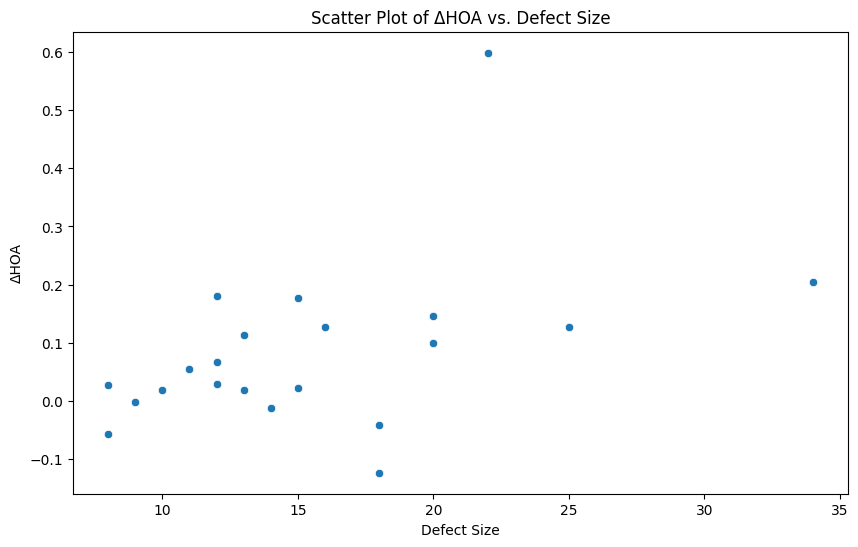

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is the dataframe with all the relevant data
# Extracting the necessary columns
ΔHOA = df['ΔHOA']
Defect = df['Defect']

# Creating a scatter plot for ΔHOA and Defect
plt.figure(figsize=(10, 6))
sns.scatterplot(x=Defect, y=ΔHOA)
plt.title('Scatter Plot of ΔHOA vs. Defect Size')
plt.xlabel('Defect Size')
plt.ylabel('ΔHOA')
plt.show()


###術前後の乱視比較

In [13]:
#SIA_D, Δasg_0, Δasg_45に関する統計量

# Splitting the dataframe again based on the 'lower-upper' column values
df_all = df
df_lower = df[df["lower-upper"] == 0]
df_upper = df[df["lower-upper"] == 1]

# Comparing the columns 'SIA_D', 'Δasg_0', 'Δasg_45' in df_upper and df_lower

# Selecting the relevant columns for comparison
columns_to_compare = ['SIA_D', 'Δasg_0', 'Δasg_45']

# Calculating statistical values for these columns in both dataframes
stats_df_all = df_all[columns_to_compare].describe()
stats_df_lower = df_lower[columns_to_compare].describe()
stats_df_upper = df_upper[columns_to_compare].describe()

print(stats_df_all)
print("")
print(stats_df_lower)
print("")
print(stats_df_upper)


           SIA_D     Δasg_0    Δasg_45
count  21.000000  21.000000  21.000000
mean    0.884828   0.140827   0.061317
std     0.569896   0.861801   0.615933
min     0.200000  -1.560450  -1.318164
25%     0.552330  -0.301631  -0.240736
50%     0.731663  -0.010470   0.205561
75%     1.063482   0.630383   0.431334
max     2.426709   2.101558   0.882085

           SIA_D     Δasg_0    Δasg_45
count  14.000000  14.000000  14.000000
mean    0.741406   0.058397   0.184310
std     0.367172   0.655101   0.507314
min     0.200000  -0.972569  -0.736869
25%     0.517273  -0.286174  -0.202471
50%     0.671924  -0.013673   0.323809
75%     1.009928   0.447196   0.467991
max     1.375730   1.348246   0.882085

          SIA_D    Δasg_0   Δasg_45
count  7.000000  7.000000  7.000000
mean   1.171672  0.305687 -0.184668
std    0.804062  1.224037  0.775281
min    0.304378 -1.560450 -1.318164
25%    0.595550 -0.456905 -0.632861
50%    0.873601  0.550848  0.040425
75%    1.702957  0.980832  0.303812
max    2

In [14]:
#術前後の乱視の比較
# Performing Wilcoxon Signed-Rank Test for CASIA_CYL_pre and CASIA_CYL_3M
wilcoxon_test_casia_cyl = wilcoxon(df['CASIA_CYL_pre'], df['CASIA_CYL_3M'])

# Wilcoxon test result for CASIA_CYL_pre and CASIA_CYL_3M
wilcoxon_test_casia_cyl_statistic, wilcoxon_test_casia_cyl_pvalue = wilcoxon_test_casia_cyl
print(wilcoxon_test_casia_cyl_statistic, wilcoxon_test_casia_cyl_pvalue)

# Calculating descriptive statistics for CASIA_CYL_pre and CASIA_CYL_3M
casia_cyl_pre_stats = df['CASIA_CYL_pre'].describe()
casia_cyl_3m_stats = df['CASIA_CYL_3M'].describe()

print(casia_cyl_pre_stats)
print("")
print(casia_cyl_3m_stats)



104.5 0.7334699630737305
count    21.000000
mean     -1.069524
std       0.681839
min      -2.400000
25%      -1.400000
50%      -0.900000
75%      -0.700000
max      -0.200000
Name: CASIA_CYL_pre, dtype: float64

count    21.000000
mean     -1.185714
std       0.699490
min      -3.100000
25%      -1.500000
50%      -1.100000
75%      -0.600000
max      -0.200000
Name: CASIA_CYL_3M, dtype: float64


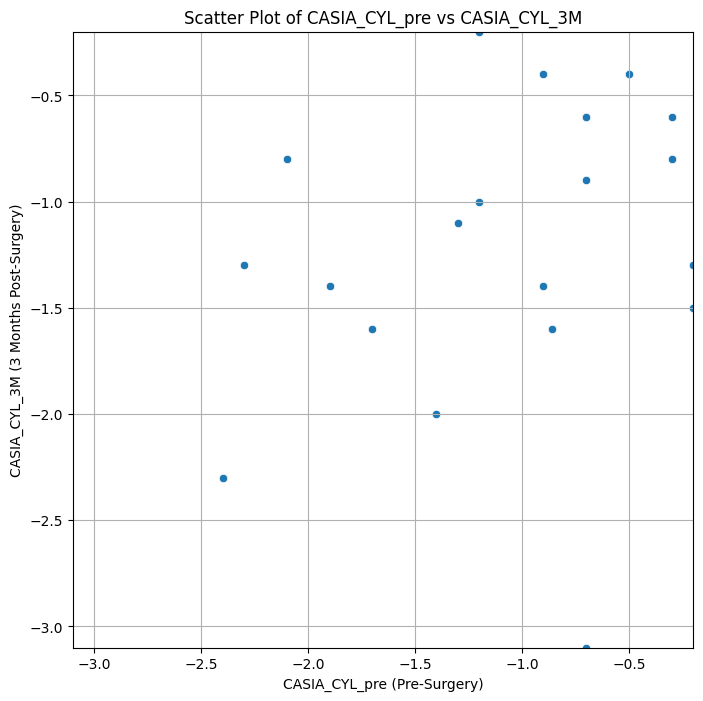

r=0.2542101558933552, p=0.2661396097872848


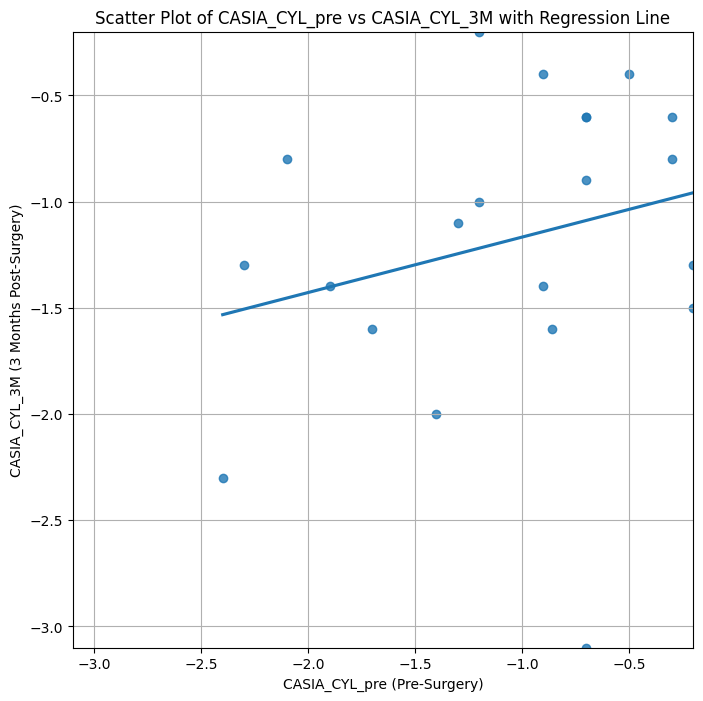

In [15]:
# Plotting a scatter plot of CASIA_CYL_pre and CASIA_CYL_3M
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x='CASIA_CYL_pre', y='CASIA_CYL_3M')
plt.title('Scatter Plot of CASIA_CYL_pre vs CASIA_CYL_3M')
plt.xlabel('CASIA_CYL_pre (Pre-Surgery)')
plt.ylabel('CASIA_CYL_3M (3 Months Post-Surgery)')
plt.grid(True)

# Setting equal scales for both axes
plt.xlim(df[['CASIA_CYL_pre', 'CASIA_CYL_3M']].min().min(), df[['CASIA_CYL_pre', 'CASIA_CYL_3M']].max().max())
plt.ylim(df[['CASIA_CYL_pre', 'CASIA_CYL_3M']].min().min(), df[['CASIA_CYL_pre', 'CASIA_CYL_3M']].max().max())

plt.show()


from scipy.stats import pearsonr

# Calculating Pearson correlation and p-value between CASIA_CYL_pre and CASIA_CYL_3M
pearson_corr_casia_cyl_result = pearsonr(df['CASIA_CYL_pre'], df['CASIA_CYL_3M'])

# Pearson correlation result and p-value
pearson_corr_casia_cyl_value, pearson_p_value_casia_cyl = pearson_corr_casia_cyl_result
print(f"r={pearson_corr_casia_cyl_value}, p={pearson_p_value_casia_cyl}")


# Plotting a scatter plot with a regression line
plt.figure(figsize=(8, 8))
sns.regplot(data=df, x='CASIA_CYL_pre', y='CASIA_CYL_3M', ci=None)  # ci=None removes the confidence interval
plt.title('Scatter Plot of CASIA_CYL_pre vs CASIA_CYL_3M with Regression Line')
plt.xlabel('CASIA_CYL_pre (Pre-Surgery)')
plt.ylabel('CASIA_CYL_3M (3 Months Post-Surgery)')
plt.grid(True)

# Setting equal scales for both axes
plt.xlim(df[['CASIA_CYL_pre', 'CASIA_CYL_3M']].min().min(), df[['CASIA_CYL_pre', 'CASIA_CYL_3M']].max().max())
plt.ylim(df[['CASIA_CYL_pre', 'CASIA_CYL_3M']].min().min(), df[['CASIA_CYL_pre', 'CASIA_CYL_3M']].max().max())

plt.show()

In [16]:
# Performing Wilcoxon Signed-Rank Test for asg_0_pre and asg_0_3M
wilcoxon_test_asg_0 = wilcoxon(df['asg_0_pre'], df['asg_0_3M'])

# Wilcoxon test result for asg_0_pre and asg_0_3M
wilcoxon_test_asg_0_statistic, wilcoxon_test_asg_0_pvalue = wilcoxon_test_asg_0
wilcoxon_test_asg_0_statistic, wilcoxon_test_asg_0_pvalue

(101.0, 0.6332969665527344)

In [17]:
# Performing Wilcoxon Signed-Rank Test for asg_0_pre and asg_0_3M
wilcoxon_test_asg_0 = wilcoxon(df['asg_45_pre'], df['asg_45_3M'])

# Wilcoxon test result for asg_0_pre and asg_0_3M
wilcoxon_test_asg_0_statistic, wilcoxon_test_asg_0_pvalue = wilcoxon_test_asg_0
wilcoxon_test_asg_0_statistic, wilcoxon_test_asg_0_pvalue

(89.0, 0.37372493743896484)

In [18]:
#乱視変化がどのような要因に関連するか検討
from scipy.stats import ttest_ind, f_oneway
import statsmodels.api as sm
from scipy.stats import spearmanr


# Extracting the relevant columns for SIA_D analysis
sia_d_data = df[['性別', 'side', 'Defect', 'SIA_D']]
sia_d_data.columns = ['Gender', 'Left/Right', 'Defect Size', 'SIA_D']

# Removing rows with missing SIA_D values
sia_d_data = sia_d_data.dropna(subset=['SIA_D'])

# Univariate Analysis
# T-tests for Gender and Left/Right
mannwhitneyu_gender = mannwhitneyu(sia_d_data[sia_d_data['Gender'] == 'M']['SIA_D'],
                         sia_d_data[sia_d_data['Gender'] == 'F']['SIA_D'])
mannwhitneyu_left_right = mannwhitneyu(sia_d_data[sia_d_data['Left/Right'] == 'L']['SIA_D'],
                             sia_d_data[sia_d_data['Left/Right'] == 'R']['SIA_D'])

# Calculating Spearman correlation and p-value between age and SIA_D
spearman_age_result = spearmanr(df['age'], df['SIA_D'])
# Spearman correlation result and p-value
spearman_age_corr_value, spearman_age_p_value = spearman_age_result


# Calculating Spearman correlation and p-value between Defect and SIA_D
spearman_defect_result = spearmanr(df['Defect'], df['SIA_D'])
# Spearman correlation result and p-value
spearman_defect_corr_value, spearman_defect_p_value = spearman_defect_result


print(f"Gender: {mannwhitneyu_gender}")
print(f"Side: {mannwhitneyu_left_right}")
print(f"Age: r={spearman_age_corr_value}, p={spearman_age_p_value}")
print(f"Defect: r={spearman_defect_corr_value}, p={spearman_defect_p_value}")



Gender: MannwhitneyuResult(statistic=63.0, pvalue=0.17805543269939555)
Side: MannwhitneyuResult(statistic=43.0, pvalue=0.4180519085356006)
Age: r=0.17844427004489263, p=0.4389871964685451
Defect: r=0.03907538760107138, p=0.8664536748321433


###惹起乱視に関する統計量

In [21]:
# Calculating the statistical measures for Δasg_0 and Δasg_45
delta_asg_0_stats = df['Δasg_0'].describe()
delta_asg_45_stats = df['Δasg_45'].describe()

print(delta_asg_0_stats)
print("")
print(delta_asg_45_stats)


count    21.000000
mean      0.140827
std       0.861801
min      -1.560450
25%      -0.301631
50%      -0.010470
75%       0.630383
max       2.101558
Name: Δasg_0, dtype: float64

count    21.000000
mean      0.061317
std       0.615933
min      -1.318164
25%      -0.240736
50%       0.205561
75%       0.431334
max       0.882085
Name: Δasg_45, dtype: float64


In [29]:
import numpy as np

# Calculating the mean values for Δasg_0 and Δasg_45
mean_delta_asg_0 = delta_asg_0_stats['mean']
mean_delta_asg_45 = delta_asg_45_stats['mean']

# Calculating SIA_D_average and SIA_ax_average
SIA_D_mean = np.sqrt(mean_delta_asg_0**2 + mean_delta_asg_45**2)
SIA_ax_mean = np.arctan2(mean_delta_asg_0, mean_delta_asg_45) * (90 / np.pi)

# Calculating the mean of the SIA_D column
SIA_D_abs_mean = df['SIA_D'].mean()
SIA_D_abs_sd = df['SIA_D'].std()


print(f"平均惹起乱視: {SIA_D_mean}D x ax{SIA_ax_mean}°")
print(f"惹起乱視度数 絶対値: {SIA_D_abs_mean}±{SIA_D_abs_sd}D")

平均惹起乱視: 0.153596944294734D x ax33.23565318193896°
惹起乱視度数 絶対値の平均: 0.8848276316033057±0.5698956970098157D
